# **Gold Price Prediction using Machine Learning and Python**

# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Uploading File

In [ ]:
from google.colab import files

upload = files.upload()

# Loading the Data Set

In [12]:
df = pd.read_csv('gld_price_data_for_prediction.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


Check number of columns & rows

In [ ]:
df.shape()

Checking null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Statistical Information

In [14]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [15]:
corr=df.corr()
corr

<ipython-input-15-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

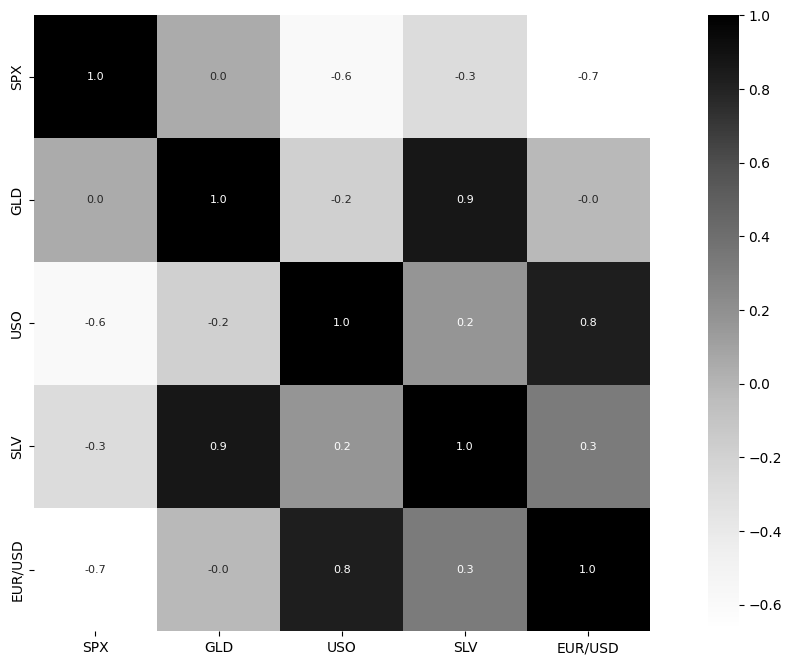

In [20]:
#heatmap for the Correlation
plt.figure(figsize=(15,8))
sns.heatmap(corr,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greys')

In [21]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-b59f4ac9eec4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

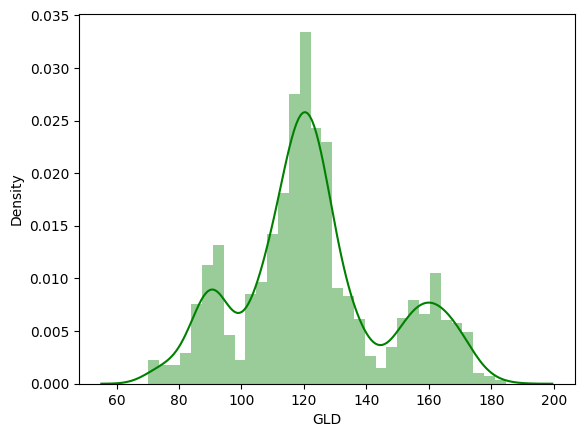

In [22]:
#plotting graph
sns.distplot(df['GLD'],color='green')

Independent and Dependent Variables

In [23]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [26]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


Training data and Model Selection.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
rgr = RandomForestRegressor(n_estimators=100)
rgr.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
#predicting the values for the x_test)
rgr.predict(x_test)

array([168.71519958,  81.95209986, 116.06010068, 127.50120074,
       120.66030142, 154.50209777, 150.43529874, 126.21289953,
       117.57319884, 126.16760011, 116.67270107, 172.32820084,
       141.40279866, 167.75339796, 115.20980019, 117.66070039,
       137.99840317, 170.1491013 , 159.15890357, 158.03260028,
       155.16950005, 125.01430019, 175.67999967, 157.35830342,
       125.14220033,  93.76219984,  77.17880002, 120.58879985,
       119.15249969, 167.47109953,  88.29260041, 125.07180009,
        91.16770046, 117.55620067, 121.07449916, 136.19470081,
       115.74740111, 115.20070061, 147.28409984, 107.05590095,
       104.06620226,  87.16929792, 126.49080045, 117.75659996,
       154.29189914, 119.72789993, 108.49659988, 107.9311985 ,
        93.08340023, 127.15979752,  74.64470057, 113.69619951,
       121.1737999 , 111.21529898, 119.0070992 , 120.93399961,
       159.60870079, 168.01140076, 146.9492967 ,  85.88279863,
        94.16580054,  86.81299912,  90.59450028, 118.98

In [34]:
#accuracy score
rgr.score(x_test,y_test)

0.9894277232978157

In [35]:
rgr.predict([[1447.160034,78.470001,15.1800,1.471692]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.98720016])

Create the Pickle File.

In [36]:
import pickle
pickle.dump(rgr,open("rgr.pkl","wb"))

In [37]:
model = pickle.load(open('rgr.pkl','rb'))
model

RandomForestRegressor()

In [38]:
rgr.predict([[1447.160034,78.470001,15.1800,1.471692]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.98720016])